#### DSC640-T301 
#### Week-10 Exercise 


#### Import TSA complaint data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

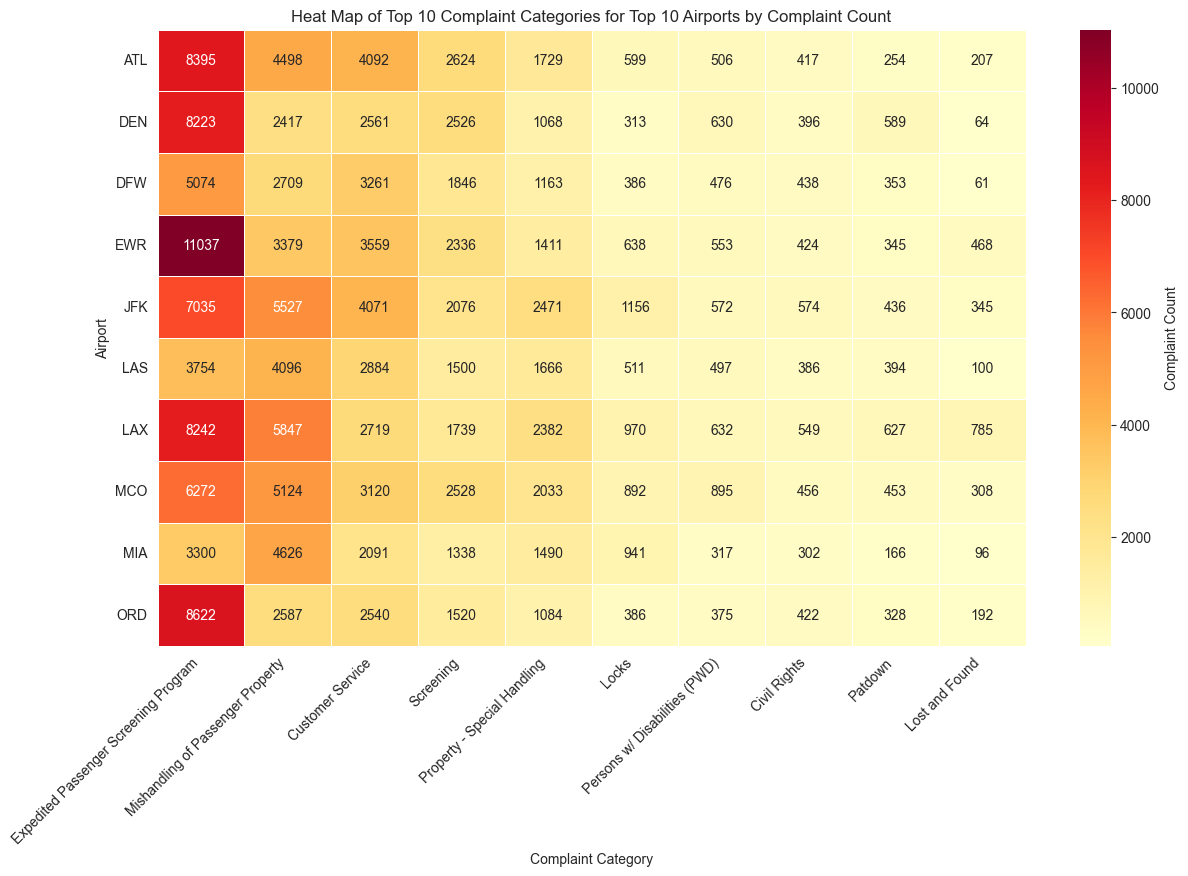

In [2]:
# Load the complaints-by-airport.csv file
complaints_airport = pd.read_csv('./complaints-by-category.csv')

# Group by 'airport' to get total complaints per airport and select top 10 airports by complaint count
top_airports = complaints_airport.groupby('airport')['count'].sum().nlargest(10).index

# Filter data for only the top 10 airports
top_airport_data = complaints_airport[complaints_airport['airport'].isin(top_airports)]

# Group by 'airport' and 'category', summing complaints to prepare data for heatmap
heatmap_data = top_airport_data.groupby(['airport', 'category'])['count'].sum().unstack(fill_value=0)

# Select top 10 categories with the highest total complaint counts across these airports
top_categories = heatmap_data.sum(axis=0).nlargest(10).index
heatmap_data_top10_categories = heatmap_data[top_categories]

# Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_top10_categories, cmap='YlOrRd', annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Complaint Count'})
plt.title('Heat Map of Top 10 Complaint Categories for Top 10 Airports by Complaint Count')
plt.xlabel('Complaint Category')
plt.ylabel('Airport')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


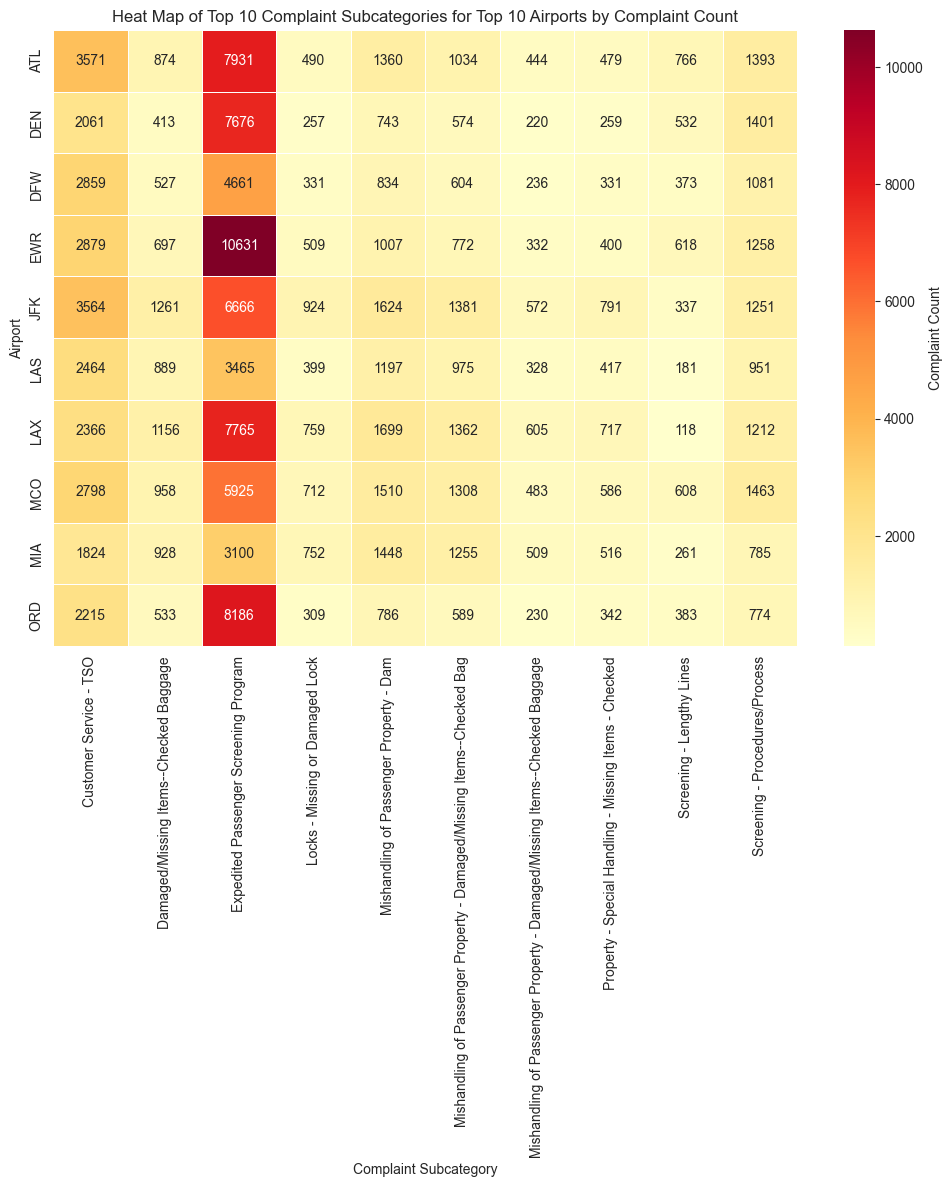

In [3]:
# Load the data from the complaints-by-subcategory.xlsx file
complaints_subcategory = pd.read_csv('./complaints-by-subcategory.csv')

# Summing up the complaints by airport and subcategory
airport_complaints_total = complaints_subcategory.groupby('airport')['count'].sum()

# Selecting the top 10 airports with the highest number of complaints
top_10_airports = airport_complaints_total.nlargest(10).index
complaints_top_10_airports = complaints_subcategory[complaints_subcategory['airport'].isin(top_10_airports)]

# Further group by subcategory to get top 10 complaint subcategories for these airports
subcategory_complaints_total = complaints_top_10_airports.groupby('subcategory')['count'].sum()
top_10_subcategories = subcategory_complaints_total.nlargest(10).index
complaints_top_10_airports_subcategories = complaints_top_10_airports[complaints_top_10_airports['subcategory'].isin(top_10_subcategories)]

# Creating a pivot table for the heatmap data with airport as rows and subcategory as columns
heatmap_data = complaints_top_10_airports_subcategories.pivot_table(
    values='count', 
    index='airport', 
    columns='subcategory', 
    aggfunc='sum', 
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Complaint Count'})
plt.title('Heat Map of Top 10 Complaint Subcategories for Top 10 Airports by Complaint Count')
plt.xlabel('Complaint Subcategory')
plt.ylabel('Airport')
plt.show()


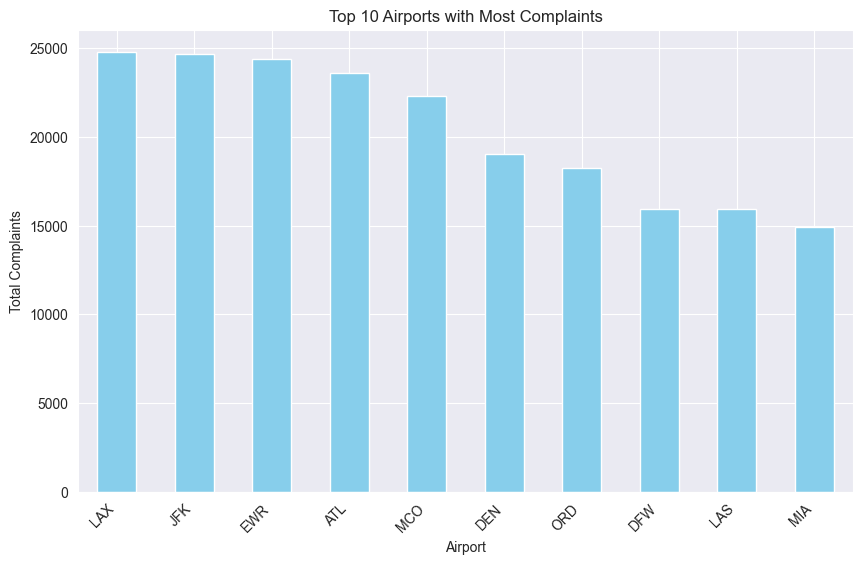

In [4]:
# Load the complaints-by-airport data
complaints_airport = pd.read_csv('./complaints-by-airport.csv')

# Group by airport and sum the complaints
airport_complaints = complaints_airport.groupby('airport')['count'].sum().nlargest(10)

# Plotting bar plot
plt.figure(figsize=(10, 6))
airport_complaints.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airports with Most Complaints')
plt.xlabel('Airport')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1400x800 with 0 Axes>

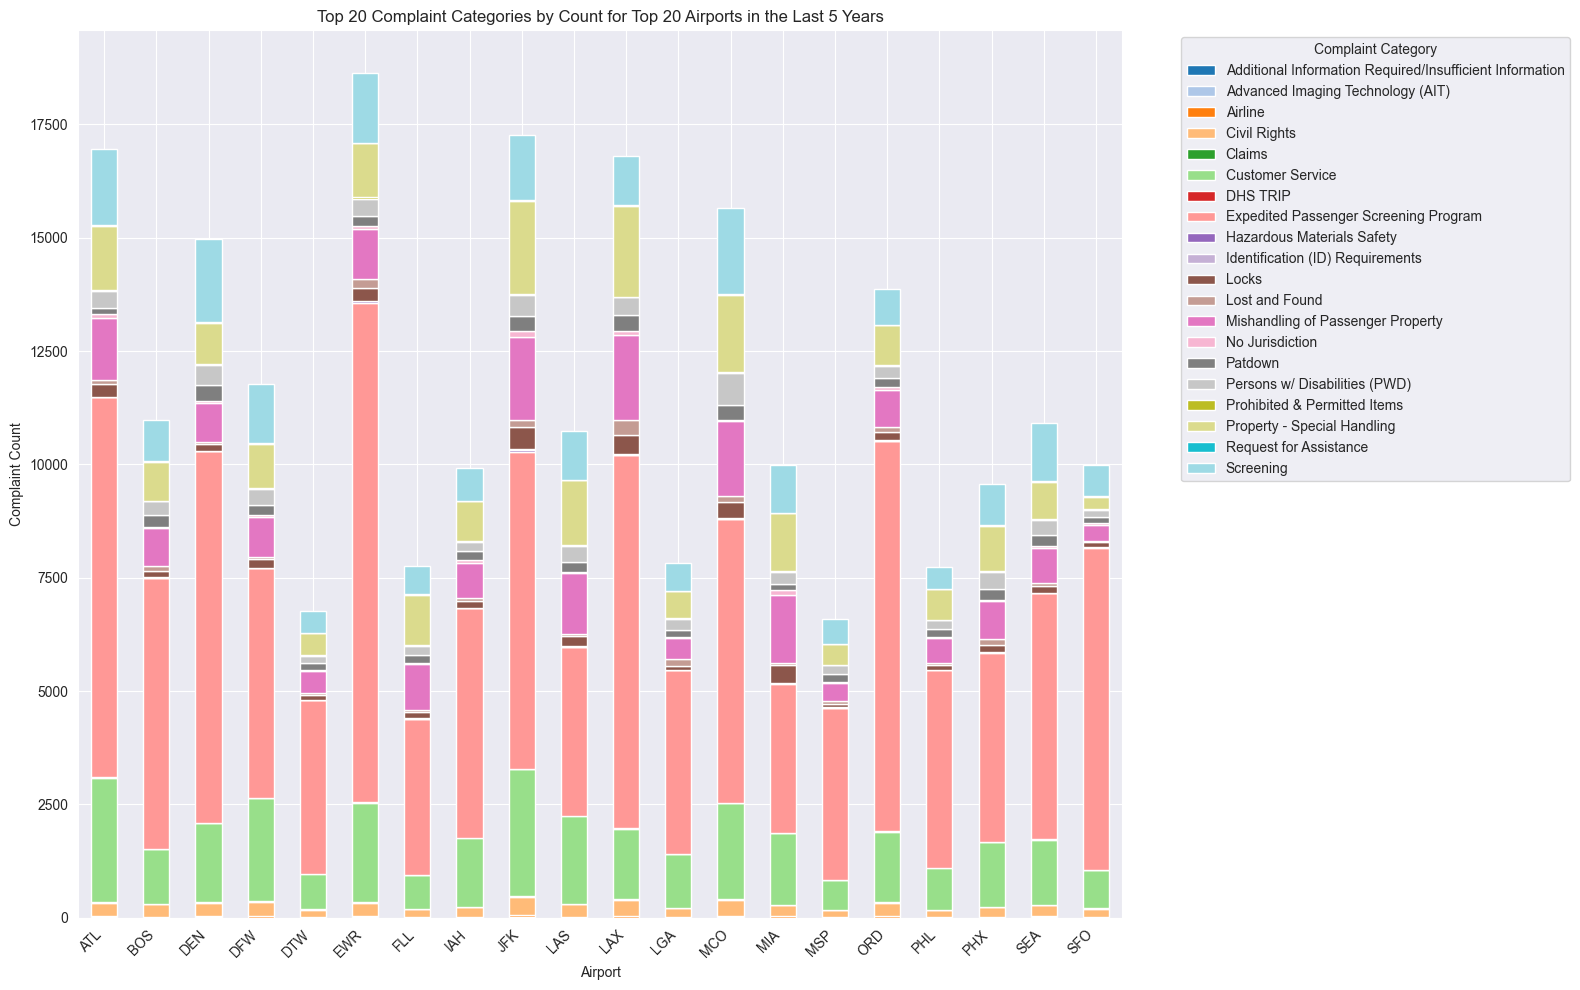

In [5]:
# Load the complaints-by-airport.csv file
complaints_category = pd.read_csv('./complaints-by-category.csv')

# Filter data for the last 5 years
complaints_category['pdf_report_date'] = pd.to_datetime(complaints_category['pdf_report_date'])
last_5_years = complaints_category['pdf_report_date'].dt.year >= (complaints_category['pdf_report_date'].dt.year.max() - 4)
complaints_last_5_years = complaints_category[last_5_years]

# Sum complaints by airport and category
complaints_summary = complaints_last_5_years.groupby(['airport', 'category'])['count'].sum().reset_index()

# Select top 20 airports and top 20 categories by total complaints count
top_20_airports = complaints_summary.groupby('airport')['count'].sum().nlargest(20).index
top_20_categories = complaints_summary.groupby('category')['count'].sum().nlargest(20).index

# Filter data to include only the top 20 airports and categories
top_complaints_data = complaints_summary[
    complaints_summary['airport'].isin(top_20_airports) &
    complaints_summary['category'].isin(top_20_categories)
]

# Pivot data for stacked bar chart
stacked_data = top_complaints_data.pivot_table(
    values='count', 
    index='airport', 
    columns='category', 
    aggfunc='sum', 
    fill_value=0
)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(16, 10))

# Customizing the plot
plt.title('Top 20 Complaint Categories by Count for Top 20 Airports in the Last 5 Years')
plt.xlabel('Airport')
plt.ylabel('Complaint Count')
plt.legend(title='Complaint Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



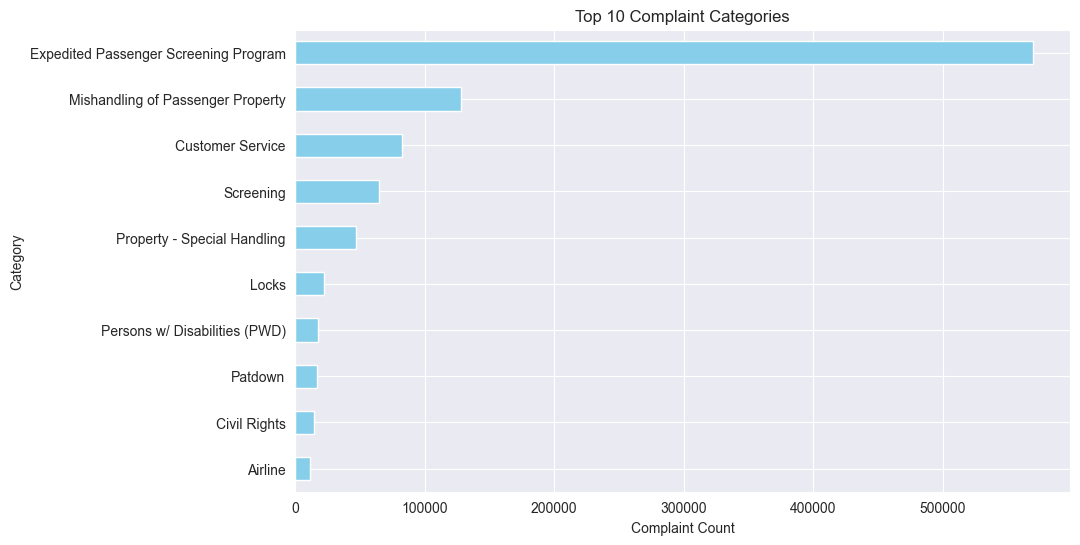

In [6]:
# Summing complaint counts by category
top_categories = complaints_category.groupby('category')['count'].sum().nlargest(10).sort_values()

# Plotting custom bar chart
plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='skyblue')
plt.title('Top 10 Complaint Categories')
plt.xlabel('Complaint Count')
plt.ylabel('Category')
plt.show()


C:\Users\gyanr\AppData\Local\Temp\ipykernel_27664\3068244970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['year_month'].dt.month


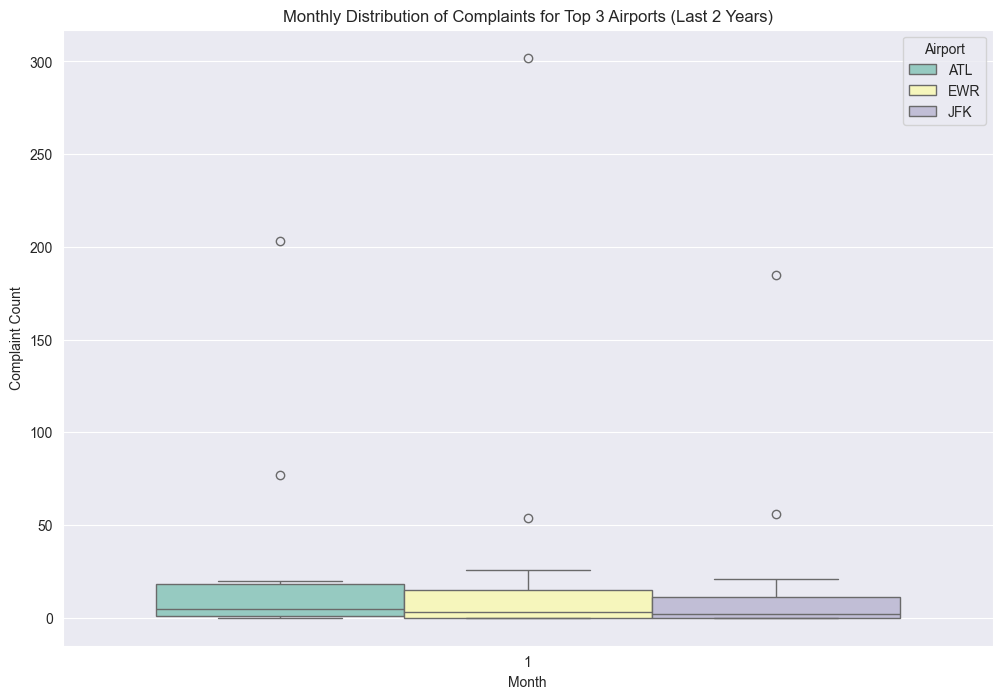

In [7]:
# Load the data
complaints_data = pd.read_csv('./complaints-by-category.csv')

# Convert 'year_month' to datetime and filter for the last 2 years
complaints_data['year_month'] = pd.to_datetime(complaints_data['year_month'], format='%Y-%m')
recent_data = complaints_data[complaints_data['year_month'] >= pd.Timestamp.now() - pd.DateOffset(years=2)]

# Find the top 3 airports with the most complaints
top_airports = recent_data.groupby('airport')['count'].sum().nlargest(3).index
filtered_data = recent_data[recent_data['airport'].isin(top_airports)]

# Extract month for the filtered data
filtered_data['month'] = filtered_data['year_month'].dt.month

# Plotting the box plot for monthly distribution of complaints for the top 3 airports
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='month', y='count', hue='airport', palette="Set3")
plt.title('Monthly Distribution of Complaints for Top 3 Airports (Last 2 Years)')
plt.xlabel('Month')
plt.ylabel('Complaint Count')
plt.legend(title='Airport')
plt.show()



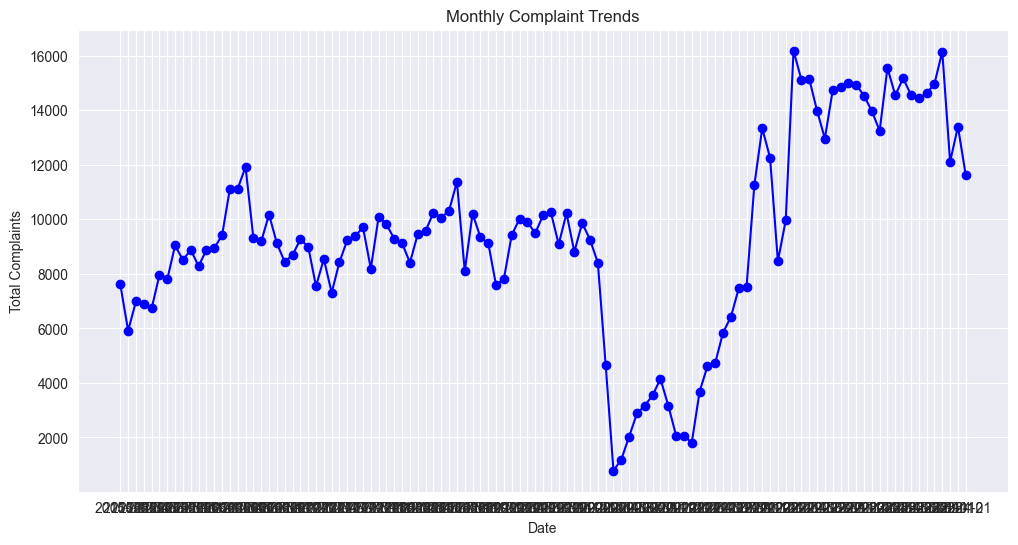

In [8]:
# Grouping complaints by month
monthly_trends = complaints_airport.groupby('year_month')['count'].sum().reset_index()

# Plotting trend line
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['year_month'], monthly_trends['count'], marker='o', color='b')
plt.title('Monthly Complaint Trends')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.show()


In [17]:
import pandas as pd
import plotly.express as px

# Load the complaints-by-airport and iata-icao data
complaints_airport = pd.read_csv('./complaints-by-airport.csv')
iata_icao = pd.read_csv('./iata-icao.csv')

# Aggregate complaint counts by airport and merge with location information
complaints_airport_total = complaints_airport.groupby('airport')['count'].sum().reset_index()
airport_locations = complaints_airport_total.merge(iata_icao[['airport', 'latitude', 'longitude']], on='airport')

# Identify top 10 airports with the most complaints
top_10_airports = airport_locations.nlargest(10, 'count')

# Create a density mapbox (Heatmap style)
fig = px.density_mapbox(
    airport_locations,
    lat='latitude',
    lon='longitude',
    z='count',
    radius=15,
    center=dict(lat=37.0902, lon=-95.7129),
    zoom=3,
    mapbox_style="carto-positron",
    title="Complaints Density Map"
)

# Add the Top 10 airports as specific markers
fig.add_scattermapbox(
    lat=top_10_airports['latitude'],
    lon=top_10_airports['longitude'],
    mode='markers+text',
    marker=dict(size=12, color='red'),
    text=top_10_airports['airport'],
    hovertext=top_10_airports['count'],
    name="Top 10 Airports"
)

# Show and Save
fig.show()


C:\Users\gyanr\AppData\Local\Temp\ipykernel_27664\3226671227.py:16: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



C:\Users\gyanr\AppData\Local\Temp\ipykernel_14392\1840856136.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.values, y=top_cats.index, palette="Reds_r", ax=ax1)
C:\Users\gyanr\AppData\Local\Temp\ipykernel_14392\1840856136.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette="Blues_r", ax=ax2)
C:\Users\gyanr\AppData\Local\Temp\ipykernel_14392\1840856136.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcats.values, y=top_subcats.index, palette="viridis", ax=ax4)


TypeError: show() got an unexpected keyword argument 'facecolor'

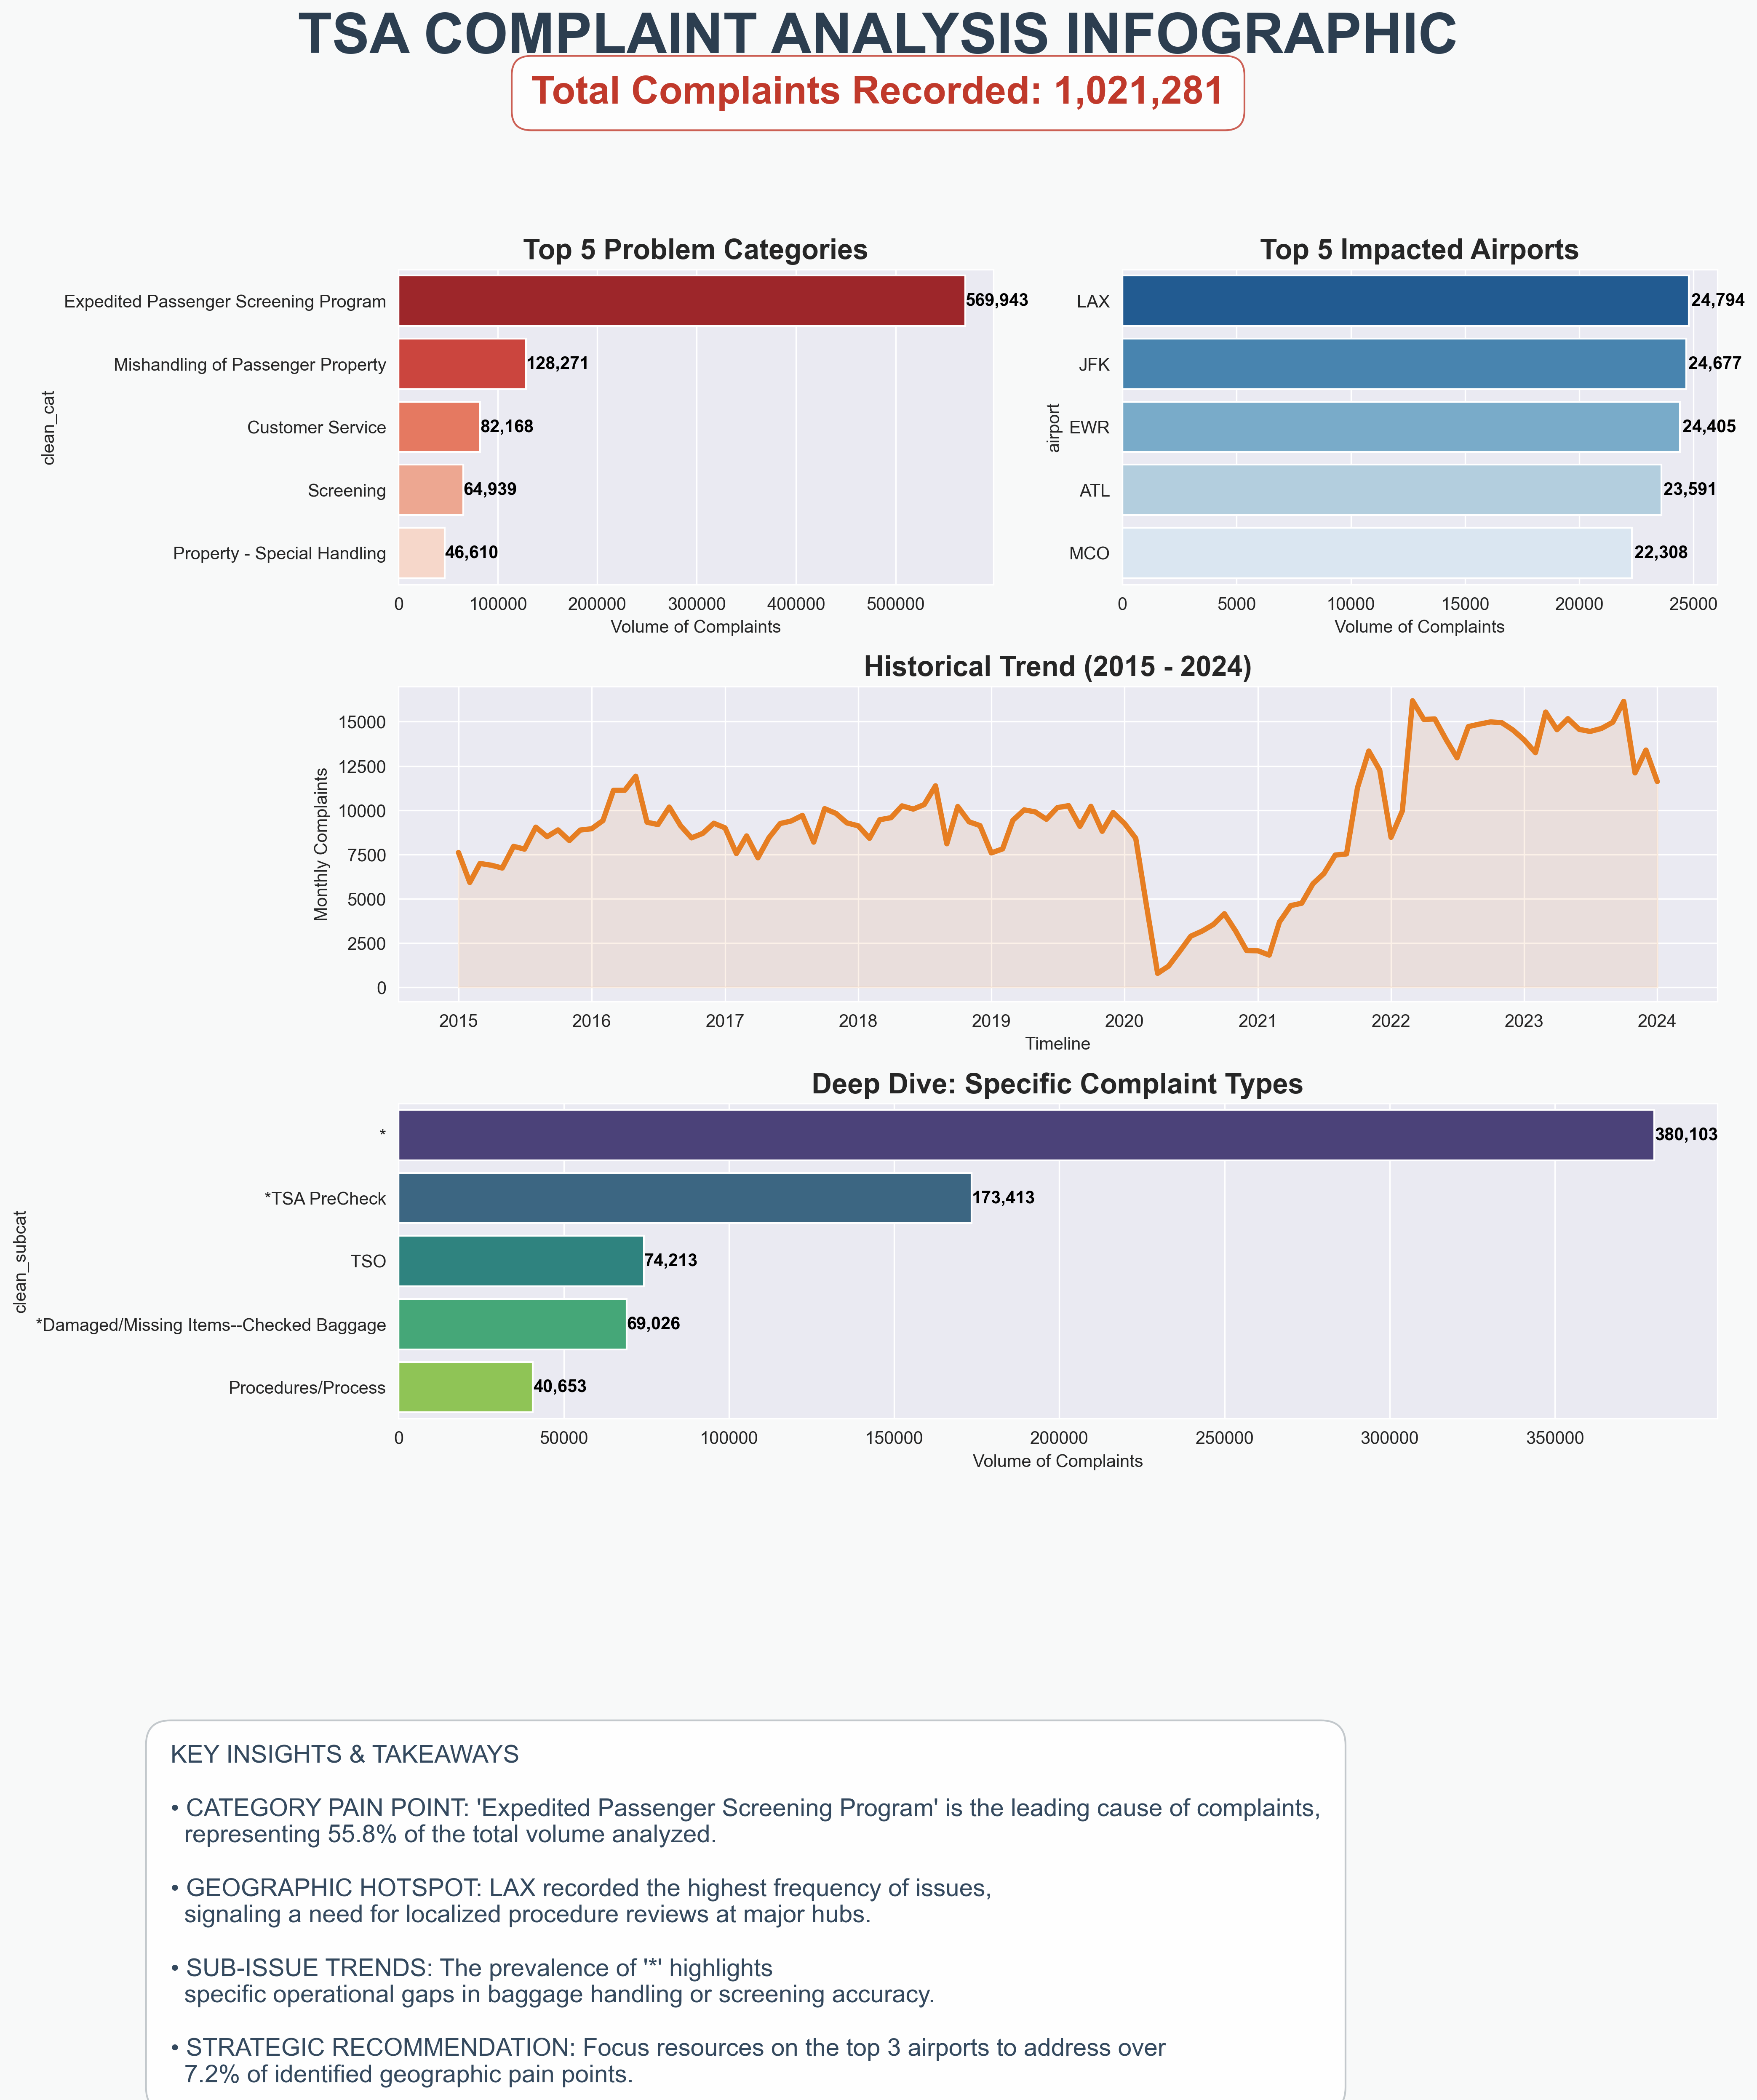

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
cat_df = pd.read_csv('./complaints-by-category.csv')
subcat_df = pd.read_csv('./complaints-by-subcategory.csv')

# Preprocessing
cat_df['year_month'] = pd.to_datetime(cat_df['year_month'])

# Aggregate Key Metrics
total_complaints = cat_df['count'].sum()
top_cats = cat_df.groupby('clean_cat')['count'].sum().sort_values(ascending=False).head(5)
top_subcats = subcat_df.groupby('clean_subcat')['count'].sum().sort_values(ascending=False).head(5)
monthly_trend = cat_df.groupby('year_month')['count'].sum().reset_index()
top_airports = cat_df.groupby('airport')['count'].sum().sort_values(ascending=False).head(5)

# Setup Infographic Canvas
fig = plt.figure(figsize=(14, 18), dpi=300)
fig.patch.set_facecolor('#F8F9F9')

# 1. Header and Big Number
plt.suptitle("TSA COMPLAINT ANALYSIS INFOGRAPHIC", fontsize=32, fontweight='bold', y=0.96, color='#2C3E50')
plt.figtext(0.5, 0.92, f"Total Complaints Recorded: {total_complaints:,}",
            ha="center", fontsize=22, color='#C0392B', fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='#C0392B', boxstyle='round,pad=0.5'))

# 2. Top Categories
ax1 = plt.subplot2grid((4, 2), (0, 0))
sns.barplot(x=top_cats.values, y=top_cats.index, palette="Reds_r", ax=ax1)
ax1.set_title("Top 5 Problem Categories", fontsize=16, fontweight='bold')
ax1.set_xlabel("Volume of Complaints")
for i, v in enumerate(top_cats.values):
    ax1.text(v + 100, i, f'{v:,}', color='black', va='center', fontweight='bold')

# 3. Top Airports
ax2 = plt.subplot2grid((4, 2), (0, 1))
sns.barplot(x=top_airports.values, y=top_airports.index, palette="Blues_r", ax=ax2)
ax2.set_title("Top 5 Impacted Airports", fontsize=16, fontweight='bold')
ax2.set_xlabel("Volume of Complaints")
for i, v in enumerate(top_airports.values):
    ax2.text(v + 100, i, f'{v:,}', color='black', va='center', fontweight='bold')

# 4. Trend Line
ax3 = plt.subplot2grid((4, 2), (1, 0), colspan=2)
sns.lineplot(data=monthly_trend, x='year_month', y='count', color='#E67E22', linewidth=3, ax=ax3)
ax3.fill_between(monthly_trend['year_month'], monthly_trend['count'], color='#E67E22', alpha=0.1)
ax3.set_title("Historical Trend (2015 - 2024)", fontsize=16, fontweight='bold')
ax3.set_ylabel("Monthly Complaints")
ax3.set_xlabel("Timeline")

# 5. Top Subcategories
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2)
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette="viridis", ax=ax4)
ax4.set_title("Deep Dive: Specific Complaint Types", fontsize=16, fontweight='bold')
ax4.set_xlabel("Volume of Complaints")
for i, v in enumerate(top_subcats.values):
    ax4.text(v + 100, i, f'{v:,}', color='black', va='center', fontweight='bold')

# 6. KEY INSIGHTS TEXT SECTION (The "Add Text" Part)
insight_text = (
        "KEY INSIGHTS & TAKEAWAYS\n\n"
        f"• CATEGORY PAIN POINT: '{top_cats.index[0]}' is the leading cause of complaints,\n"
        f"  representing { (top_cats.values[0]/total_complaints)*100:.1f}% of the total volume analyzed.\n\n"
        f"• GEOGRAPHIC HOTSPOT: {top_airports.index[0]} recorded the highest frequency of issues,\n"
        f"  signaling a need for localized procedure reviews at major hubs.\n\n"
        "• SUB-ISSUE TRENDS: The prevalence of '" + top_subcats.index[0] + "' highlights\n"
                                                                           "  specific operational gaps in baggage handling or screening accuracy.\n\n"
                                                                           "• STRATEGIC RECOMMENDATION: Focus resources on the top 3 airports to address over\n"
                                                                           f"  { (top_airports.head(3).sum()/total_complaints)*100:.1f}% of identified geographic pain points."
)

plt.figtext(0.1, 0.05, insight_text, fontsize=14, color='#34495E',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='#BDC3C7', boxstyle='round,pad=1'))

# Final Polishing
plt.tight_layout(rect=[0, 0.15, 1, 0.90])
plt.show('tsa_infographic_with_text.png', facecolor=fig.get_facecolor())
plt.show()